Tópicos Especiais em Machine Learning - Gabriel Tozatto Zago
Alexsander Alves Novaes
20212mpeca0037

Active Learning 
Prazo: 30/11

Objetivo:
Aplicar Active Learning num banco de dados para demonstrar que o treinamento de um modelo utilizando esta técnica, mesmo utilizando menos dados, atinge resultados melhores do que o mesmo modelo utilizando dados amostrados aleatoriamente com a mesma quantidade de amostras.

O resultado deve gerar um gráfico parecido com o da figura abaixo.
C:\Users\alexs\active_learning\example_graph.png

Entregáveis:

Descrição do que foi feito em formato de artigo científico.
Link para o código (bem documentado) no github.


In [1]:
import os
import numpy as np
import pandas as pd
import imageio as io
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

In [54]:
#carregando arquivo CSV do exercicio do Gustavo
origdata = pd.read_csv("Iris.csv")

#apresenta na tela conteúdo do arquivo (150 linhas x 6 colunas)
origdata

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
#definindo apenas duas colunas para o exercicio
k1, k2 = 'PetalLengthCm', 'PetalWidthCm'

#carregando arquivo com as colunas k1, k2 e Species
data = origdata[[k1, k2, 'Species']].copy()

#apresenta na tela o conteudo do novo arquivo (150 linhas x 3 colunas)
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [62]:
X = data[[k1, k2]]
y = data['Species']

#rotulando as espécies em 0, 1 e 2
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2

data

C:\Users\alexs\AppData\Local\Temp\ipykernel_16400\2268320959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-setosa'] = 0
C:\Users\alexs\AppData\Local\Temp\ipykernel_16400\2268320959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-versicolor'] = 1
C:\Users\alexs\AppData\Local\Temp\ipykernel_16400\2268320959.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Iris-virginica'] = 2


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


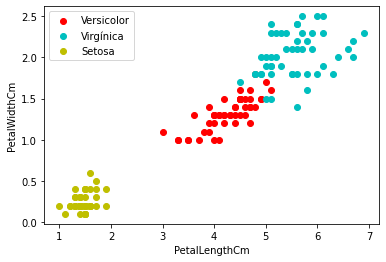

In [89]:
#plotando em um gráfico a distribuição das amostras

plt.figure()
iris_setosa = y == 0
iris_versicolor = y == 1
iris_virginica = y == 2

plt.scatter(X[k1][iris_versicolor], X[k2][iris_versicolor], c='r', label='Versicolor')
plt.scatter(X[k1][iris_virginica], X[k2][iris_virginica], c='c', label='Virgínica')
plt.scatter(X[k1][iris_setosa], X[k2][iris_setosa], c='y', label='Setosa')

plt.xlabel(k1)
plt.ylabel(k2)
plt.legend()
plt.show()

In [71]:
#excluindo dos resultados a iris setosa
X1 = X[y != 0]
y1 = y[y != 0]
X1[:5]

,PetalLengthCm,PetalWidthCm
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


In [72]:
#redefinindo os indices
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)
y1 -= 1
print(y1.unique())
X1[:5]

[0 1]


,PetalLengthCm,PetalWidthCm
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5


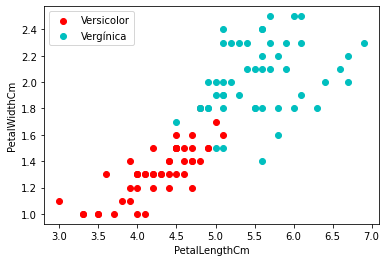

In [91]:
#plotando grafico e salvando
fig = plt.figure()

plt.scatter(X1[k1][y1==0], X1[k2][y1==0], c='r', label='Versicolor')
plt.scatter(X1[k1][y1==1], X1[k2][y1==1], c='c', label='Vergínica')

plt.xlabel(k1)
plt.ylabel(k2)
fig.savefig('main.jpg', dpi=100)
plt.legend()
plt.show() 

In [92]:
#Treinamos um kernel SVM linear em todos os dados para entender o modelo SVM que obteríamos ao usar todos os dados. 
# Como este é um modelo SVM linear, o limite de decisão (o limite que separa as duas classes) será uma linha reta. 
# Observamos a inclinação e a interceptação do limite de decisão.

y1 = y1.astype(dtype=np.uint8)
clf0 = LinearSVC()
clf0.fit(X1, y1)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
print(clf0.coef_)
print(clf0.intercept_)

[[0.28015248 1.70097747]]
[-4.17110902]


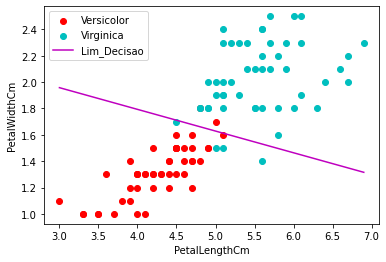

In [97]:
#Aqui, traçamos o limite de decisão junto com todos os pontos de dados. 
#O limite de decisão é uma linha reta neste caso (porque o modelo é um SVM Linear). 
#"clf0" é o classificador treinado (SVM). 
# Obtemos os coeficientes de "clf0.coef_" e "clf0.intercept". 
# "a0", "b0", "c0" são os coeficientes da linha (Equação de Linha: a0*x + b0*y + c0 = 0; y = -(a0*x + c0)/b0). 
# Obtemos 100 pontos nesta linha ( lx0- has the x-corrdinates; ly0- has the y-coordinates) e os plotamos (uma linha magenta). 
# Vamos chamar isso de limite de decisão ideal (este pode não ser o limite de decisão ideal para todos os SVMs quando usamos 
# diferentes tipos de kernels de SVM, mas, de fato, será um bom limite de decisão).
#Em seguida, plotamos todos os pontos no conjunto de dados em ciano e vermelho de acordo com suas classes.

xmin, xmax = X1[k1].min(), X1[k1].max()
ymin, ymax = X1[k2].min(), X1[k2].max()
stepx = (xmax - xmin)/99
stepy = (ymax - ymin)/99
a0, b0, c0 = clf0.coef_[0, 0], clf0.coef_[0, 1], clf0.intercept_
# Formula para referencia
# a*x + b*y + c = 0
# y = -(a*x + c)/b

lx0 = [xmin + stepx * i for i in range(100)]
ly0 = [-(a0*lx0[i] + c0)/b0 for i in range(100)]

plt.figure()

plt.scatter(X1[k1][y1==0], X1[k2][y1==0], c='r', label='Versicolor')
plt.scatter(X1[k1][y1==1], X1[k2][y1==1], c='c', label='Virginica')

plt.plot(lx0, ly0, c='m', label = 'Lim_Decisao')

plt.xlabel(k1)
plt.ylabel(k2)
plt.legend()
plt.show()
#A linha roxa é o limite de decisão do modelo SVM. Os pontos vermelho e ciano são as duas classes.

In [98]:
#Agora, dividimos o conjunto de dados em duas partes — pool(80%) e test(20%). 
X_pool, X_test, y_pool, y_test = train_test_split(X1, y1, test_size=0.2, random_state=2)
X_pool, X_test, y_pool, y_test = X_pool.reset_index(drop=True), X_test.reset_index(drop=True), y_pool.reset_index(drop=True), y_test.reset_index(drop=True)

In [99]:
# Vamos aplicar a função de decisão do SVM em dois pontos de dados. 
# Geralmente, para um SVM linear de duas classes, a função de decisão produz valores positivos para uma das classes 
# (um lado do limite de decisão) e valores negativos para a outra classe (outro lado do limite de decisão) e zero no limite de decisão .
# Para um SVM linear, a magnitude da função de decisão é igual à distância do ponto de dados da função de decisão. 
# Isso ocorre porque, se um ponto estiver próximo ao limite de decisão, ele pode ser um valor discrepante da classe 
# do outro lado do limite de decisão.

clf0.decision_function(X_pool.iloc[6:8])

array([-0.55706964,  0.26339759])

In [100]:
# A função find_most_ambiguous dá o ponto que é o mais ambíguo para o classificador. 
# Para um classificador SVM, se um ponto de dados estiver mais próximo do limite de decisão e menos ambíguo 
# se o ponto de dados estiver mais longe do limite de decisão, independentemente de qual lado do limite de decisão o ponto esteja. 
# Assim, find_most_ambiguous, dá o ponto não rotulado que está mais próximo do limite de decisão.

def find_most_ambiguous(clf, unknown_indexes):
    
    ind = np.argmin(np.abs( 
        list(clf0.decision_function(X_pool.iloc[unknown_indexes]) )
        ))
    return unknown_indexes[ind]

In [113]:
#A função, plot_svm, é usada para plotar o seguinte:
#limite de decisão SVM, os pontos de dados dos dados do trem de acordo com sua classe e os pontos de dados no conjunto desconhecido de amostras.
#Nesta função, primeiro, obtemos os dados do trem ( X_train, y_train) e os dados não rotulados ( X_unk, y_unk) de train_indexese unknown_indexes, respectivamente.
#Traçamos todos os pontos não rotulados do pool em preto. Em seguida, plotamos todos os pontos dos dados do trem em cores diferentes (vermelho e ciano) de acordo com seus rótulos de classe. 
# Obtemos os coeficientes do limite de decisão (linha reta) de clf.coef_ e clf.intercept. 
# Usando isso e a fórmula de uma linha reta, traçamos essa linha (linha verde tracejada). 
# Também temos o limite de decisão ideal calculado anteriormente. Esta linha também é plotada (em magenta).
#Por fim, traçamos o new_indexponto, ou seja, o ponto mais ambíguo (estrela amarela).

def plot_svm(clf, train_indexes, unknown_indexes, new_index = False, title = False, name = False):
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]

    X_unk = X_pool.iloc[unknown_indexes]

    if new_index:
        X_new = X_pool.iloc[new_index]

    a, b, c = clf.coef_[0, 0], clf.coef_[0, 1], clf.intercept_
    # Straight Line Formula
    # a*x + b*y + c = 0
    # y = -(a*x + c)/b

    lx = [xmin + stepx * i for i in range(100)]
    ly = [-(a*lx[i] + c)/b for i in range(100)]

    fig = plt.figure(figsize=(9,6))

    plt.scatter(X_unk[k1], X_unk[k2], c='k', marker = '.', label = 'unknown_indexes')
    plt.scatter(X_train[k1][y_train==0], X_train[k2][y_train==0], c='r', marker = 'o', label = 'Versicolor')
    plt.scatter(X_train[k1][y_train==1], X_train[k2][y_train==1], c='c', marker = 'o', label = 'Virginica')
    
    plt.plot(lx, ly, c='m', label = 'lim_decisao_ideal')
    plt.plot(lx0, ly0, '--', c='g', label = 'lim_decisao')

    if new_index:
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125, label = '+Ambiguo')
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)

    if title:
        plt.title(title)
    
    plt.xlabel(k1)
    plt.ylabel(k2)

    if name:
        fig.set_size_inches((9,6))
        plt.savefig(name, dpi=100)
    plt.legend()
    plt.show()

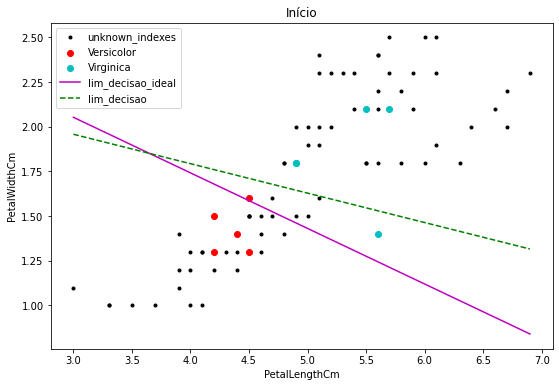

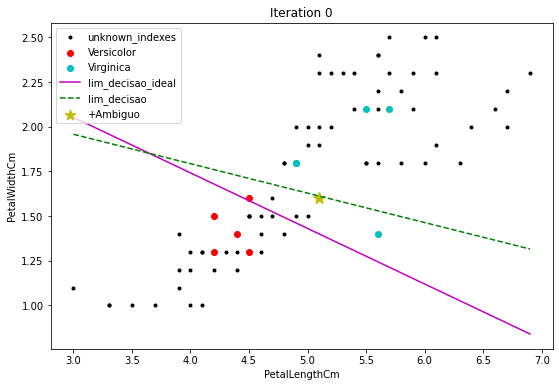

In [115]:
# Tomamos os primeiros 10 índices/pontos de dados do pool como os dados iniciais do treinamento e os 70 pontos restantes como amostras não rotuladas. 
# Criamos o gráfico inicial com todas as amostras não rotuladas, o limite de decisão ideal e os 10 pontos de dados do treinamento.
# Em seguida, treinamos um SVM nos dados do treinamento e encontramos o ponto mais ambíguo e criamos um novo gráfico (“Iteração 0”) 
# com este ponto como uma estrela amarela e também traçamos o limite de decisão do SVM treinado.

train_indexes = list(range(10))
unknown_indexes = list(range(10, 80))
X_train = X_pool.iloc[train_indexes]
y_train = y_pool.iloc[train_indexes]
clf = LinearSVC()
clf.fit(X_train, y_train)

folder = "flores/"

try:
    os.mkdir(folder)
except:
    pass

filenames = ["ActiveLearning-flores.jpg"] * 2

title = "Início"
name = folder + ("flores_0a.jpg")
plot_svm(clf, train_indexes, unknown_indexes, False, title, name)

filenames.append(name)

n = find_most_ambiguous(clf, unknown_indexes)
unknown_indexes.remove(n)

title = "Iteration 0"
name = folder + ("flores_0b.jpg")
filenames.append(name)
plot_svm(clf, train_indexes, unknown_indexes, n, title, name)

c:\Users\alexs\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


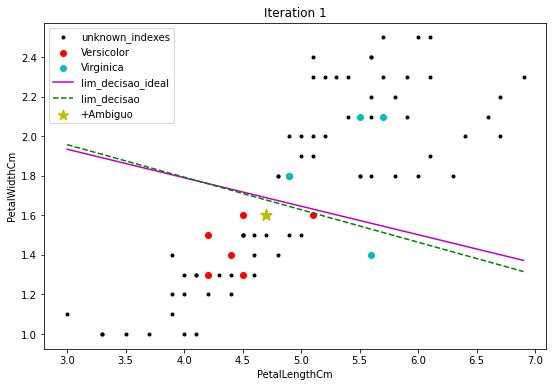

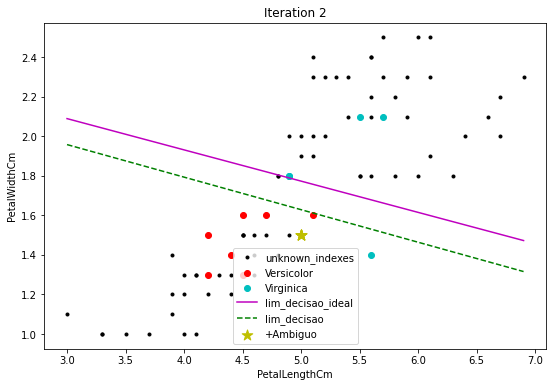

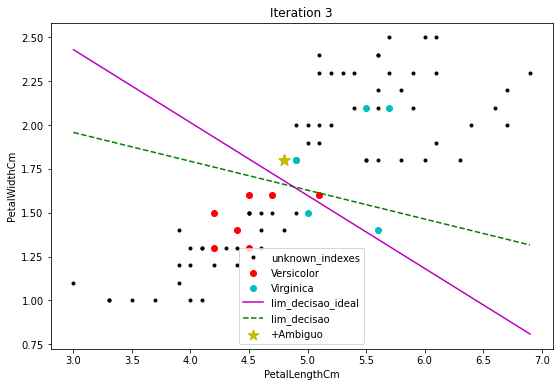

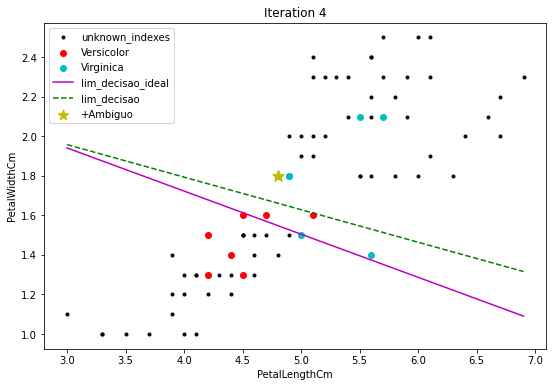

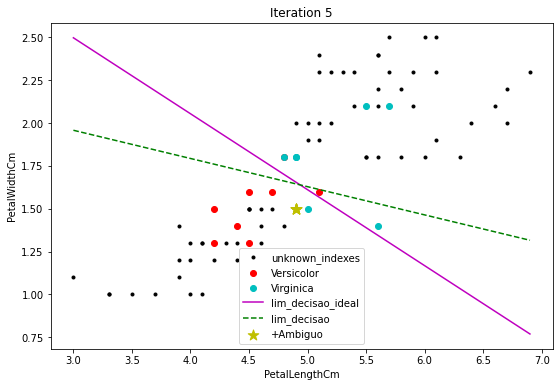

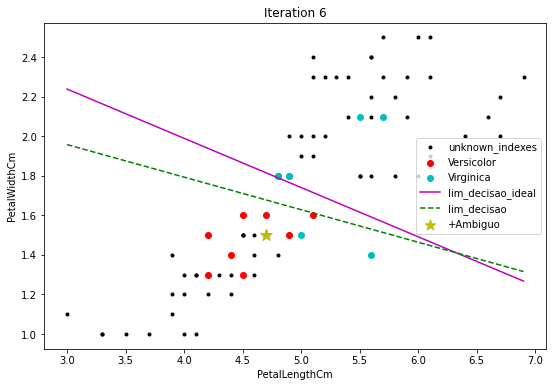

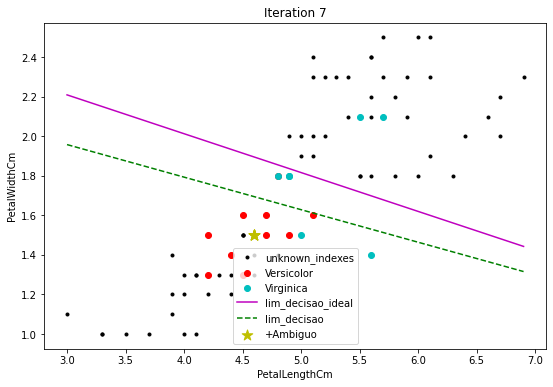

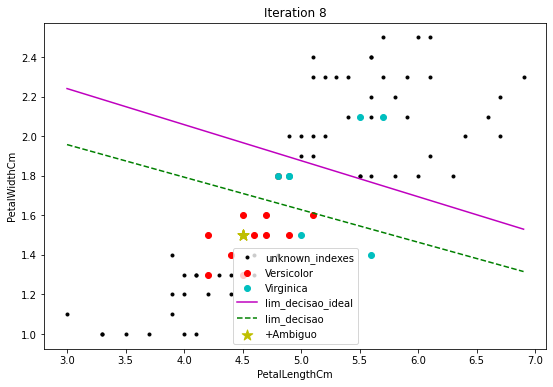

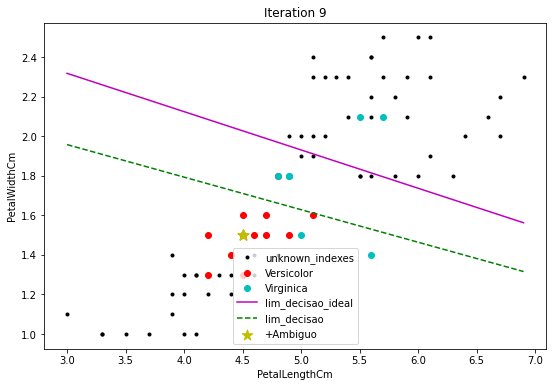

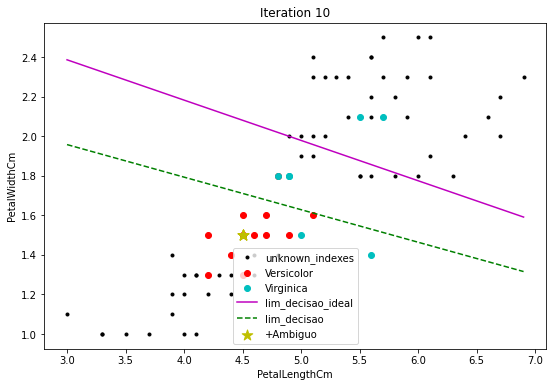

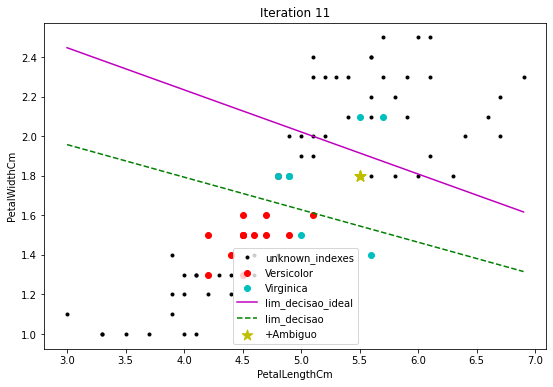

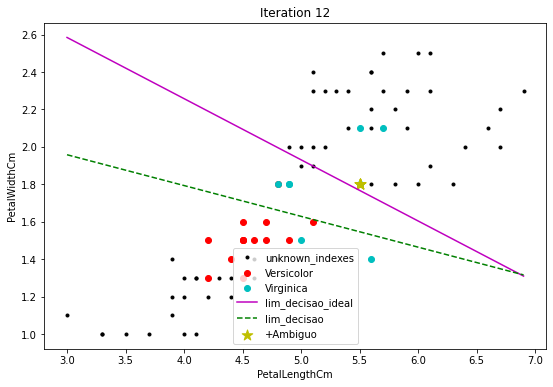

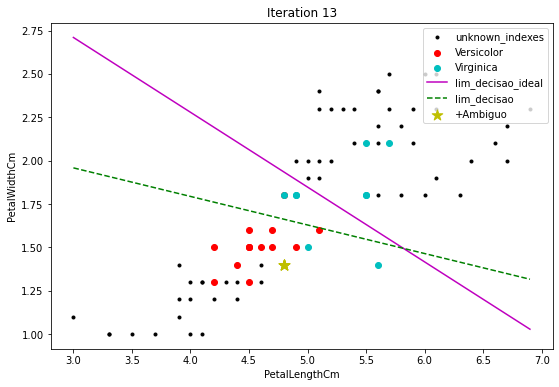

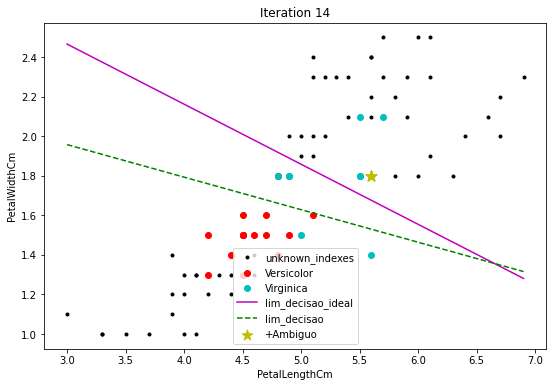

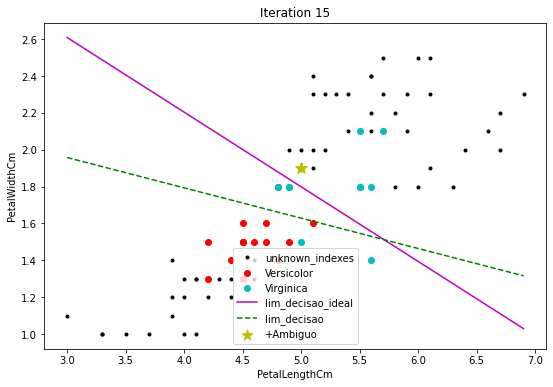

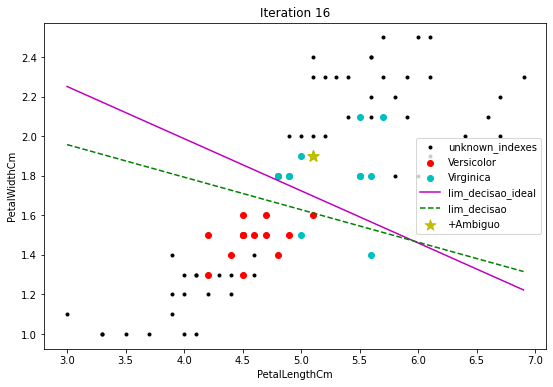

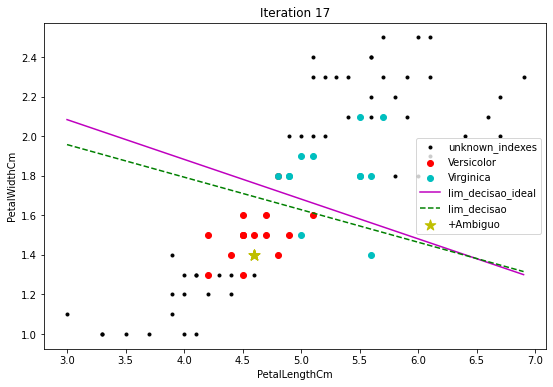

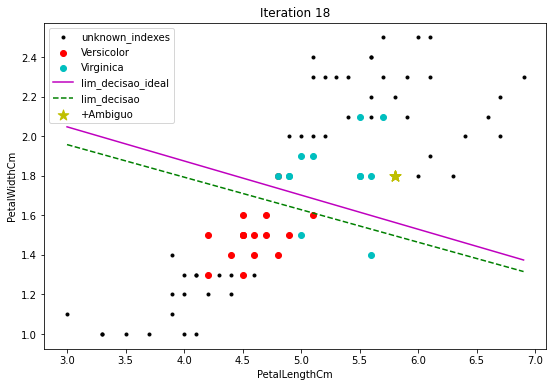

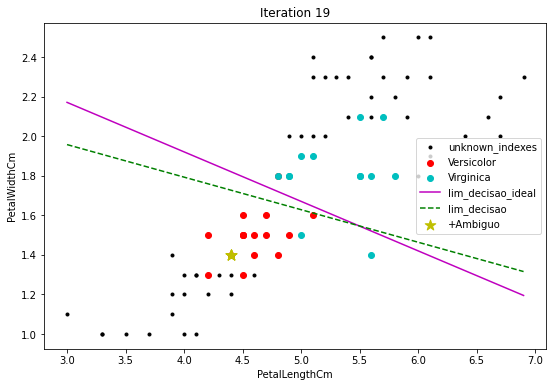

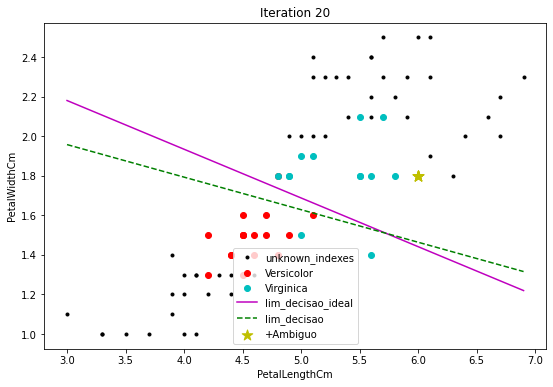

In [116]:
# Em seguida, executamos o algoritmo de aprendizado ativo por 5 iterações. 
# Em cada um deles, adicionamos o ponto mais ambíguo aos dados de treinamento e treinamos um SVM, 
# encontramos o ponto mais ambíguo nesta etapa e então criamos um gráfico de tudo isso.

t = []
for i in range(20):
    
    train_indexes.append(n)
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]
    clf = LinearSVC()
    clf.fit(X_train, y_train)
    title, name = "Iteration "+str(i+1), folder + ("flores_%d.jpg" % (i+1))

    n = find_most_ambiguous(clf, unknown_indexes)
    unknown_indexes.remove(n)
    plot_svm(clf, train_indexes, unknown_indexes, n, title, name)
    filenames.append(name)

In [118]:
#criando gif a partir das imagens
import imageio.v2 as imageio

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
    imageio.mimsave('flores.gif', images, duration = 1)
try:
    os.mkdir('flores')
except:
    pass
os.listdir('flores')

['flores_0a.jpg',
 'flores_0b.jpg',
 'flores_1.jpg',
 'flores_10.jpg',
 'flores_11.jpg',
 'flores_12.jpg',
 'flores_13.jpg',
 'flores_14.jpg',
 'flores_15.jpg',
 'flores_16.jpg',
 'flores_17.jpg',
 'flores_18.jpg',
 'flores_19.jpg',
 'flores_2.jpg',
 'flores_20.jpg',
 'flores_3.jpg',
 'flores_4.jpg',
 'flores_5.jpg',
 'flores_6.jpg',
 'flores_7.jpg',
 'flores_8.jpg',
 'flores_9.jpg']

In [ ]:
#Abrindo GIF
with open('flores.gif','rb') as f:
    display(image(data=f.read(), format='gif'))

Observe que no GIF acima, a linha verde se aproxima do limite de decisão ideal à medida que adicionamos mais pontos (número de iterações).

Obtemos o GIF acima quando executamos 20 iterações do algoritmo de aprendizado ativo. Observe que, para isso, usamos 2 como o estado aleatório ao dividir os dados em teste e pool.
Observe que conforme o número de iterações aumenta no GIF abaixo, a linha verde se aproxima cada vez mais do limite de decisão ideal .

Observe que o aprendizado ativo pode ser usado com outros modelos de aprendizado de máquina/aprendizado profundo (não apenas SVMs).

Conclusão
Vemos que treinamos um bom classificador, ou seja, um classificador que teria um desempenho próximo ao SVM treinado com todos os pontos, embora tenhamos utilizado um número muito pequeno de pontos. É assim que o aprendizado ativo pode ser usado para criar modelos robustos rotulando menos pontos de dados.